<a href="https://colab.research.google.com/github/AntonioBMesquita/Challenge-Telecomx/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
dados_customer = pd.json_normalize(dados['customer'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

dados_normalizados = pd.concat([dados[['customerID','Churn']],dados_customer, dados_phone,  dados_internet, dados_account], axis=1)
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

In [4]:
dados_normalizados.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [5]:
dados_normalizados.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [6]:
dados_normalizados = dados_normalizados[dados_normalizados['Churn']!= '']
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
dados_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [8]:
dados_normalizados.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
dados_normalizados['Charges.Total'] = pd.to_numeric(dados_normalizados['Charges.Total'], errors='coerce').fillna(0)
dados_normalizados.dtypes

/tmp/ipython-input-1984627208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Total'] = pd.to_numeric(dados_normalizados['Charges.Total'], errors='coerce').fillna(0)


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [10]:
dados_normalizados.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [11]:
dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Monthly']/30
dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Diary'].round(2)
dados_normalizados

/tmp/ipython-input-2727312924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Monthly']/30
/tmp/ipython-input-2727312924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Diary'].round(2)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [12]:
pd.set_option('display.max_columns', None)
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [13]:
dicionario_binario = {'Yes':1, 'No':0,'No internet service': 0,'No phone service': 0}

In [14]:
colunas_binarias = ['Churn',
                    'Partner',
                    'Dependents',
                    'PhoneService',
                    'MultipleLines',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies',
                    'PaperlessBilling']

In [15]:
dados_normalizados[colunas_binarias] = dados_normalizados[colunas_binarias].replace(dicionario_binario)
dados_normalizados

/tmp/ipython-input-1626507951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[colunas_binarias] = dados_normalizados[colunas_binarias].replace(dicionario_binario)
/tmp/ipython-input-1626507951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados[colunas_binarias] = dados_normalizados[colunas_binarias].replace(dicionario_binario)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


#📊 Carga e análise

In [16]:
dados_clientes= dados_normalizados[dados_normalizados['Churn']==1]
dados_clientes = dados_clientes.reset_index()
dados_clientes = dados_clientes.drop('index', axis=1)
dados_clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
1,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
2,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
3,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,1,0,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.09
4,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,9961-JBNMK,1,Male,1,0,0,21,1,0,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.23
1865,9965-YOKZB,1,Male,1,0,0,9,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.80
1866,9985-MWVIX,1,Female,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.34
1867,9986-BONCE,1,Female,0,0,0,4,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.70


In [17]:
dados_evasao = dados_normalizados[dados_normalizados['Churn']==1]
dados_evasao = dados_evasao.reset_index()
dados_evasao = dados_evasao.drop('index', axis=1)
dados_evasao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
1,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
2,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
3,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,1,0,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.09
4,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,9961-JBNMK,1,Male,1,0,0,21,1,0,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.23
1865,9965-YOKZB,1,Male,1,0,0,9,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.80
1866,9985-MWVIX,1,Female,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.34
1867,9986-BONCE,1,Female,0,0,0,4,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.70


In [18]:
dados_evasao.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Diary
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.749064,74.441332,1531.796094,2.481450
std,0.0,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.433668,24.666053,1890.822994,0.822287
min,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.630000
25%,1.0,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.870000
50%,1.0,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.650000,703.550000,2.660000
75%,1.0,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,3.940000


In [45]:
total_genero = dados_normalizados['gender'].value_counts()
evasao_genero = dados_evasao['gender'].value_counts()

dados_genero = pd.DataFrame({
    'Total Clientes': total_genero,
    'Total Evasao': evasao_genero})


dados_genero.index.name = 'Genero'
dados_genero['Taxa de Evasao'] = (
    dados_genero['Total Evasao'] / dados_genero['Total Clientes'] * 100
).round(2)
dados_genero

,Total Clientes,Total Evasao,Taxa de Evasao
Genero,,,
Female,3488,939,26.92
Male,3555,930,26.16


In [46]:
s_dados_genero = dados_genero.style

s_dados_genero.format({'Taxa de Evasao' :'{:.2f}%'})


cabecalho = {
    'selector':'th',
    'props':'text-align:left; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}
caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}
s_dados_genero.set_caption("Evasão de Clientes por sexo")
s_dados_genero.set_table_styles([cabecalho,celulas,caption])
s_dados_genero

,Total Clientes,Total Evasao,Taxa de Evasao
Genero,,,
Female,3488,939,26.92%
Male,3555,930,26.16%


In [43]:
dados_senior = pd.crosstab(dados_normalizados['SeniorCitizen'],
                             dados_normalizados['Churn'],
                             normalize='index') * 100
dados_senior = dados_senior.round(2)
dados_senior.index = ['Não-Idoso', 'Idoso']
dados_senior.columns = ['Ficou', 'Saiu']
dados_senior

,Ficou,Saiu
Não-Idoso,76.39,23.61
Idoso,58.32,41.68


In [44]:
s_dados_senior = dados_senior.style
s_dados_senior.format('{:.2f}%')


cabecalho = {
    'selector':'th',
    'props':'text-align:left; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}
caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}
s_dados_senior.set_caption("Divisão de Clientes por Idade")
s_dados_senior.set_table_styles([cabecalho,celulas,caption])
s_dados_senior

,Ficou,Saiu
Não-Idoso,76.39%,23.61%
Idoso,58.32%,41.68%


In [41]:
dados_contrato = dados_evasao['Contract'].value_counts()
dados_contrato = pd.DataFrame(dados_contrato)
dados_contrato.index.name = 'Tipo de contrato'
dados_contrato.columns = ['Evasao']
porcentagem = dados_contrato['Evasao'].to_numpy()
porcentagem = 100 * porcentagem / porcentagem.sum()
dados_contrato['Porcentagem'] = porcentagem.round(2)
dados_contrato.index.name = 'Tipo de contrato'
dados_contrato

,Evasao,Porcentagem
Tipo de contrato,,
Month-to-month,1655,88.55
One year,166,8.88
Two year,48,2.57


In [42]:
s_dados_contrato = dados_contrato.style

s_dados_contrato.format({'Porcentagem':'{:.2f}%'})


cabecalho = {
    'selector':'th',
    'props':'text-align:left; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}
caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}
s_dados_contrato.set_caption("Porcentagem de Evasão por tipo de contrato")
s_dados_contrato.set_table_styles([cabecalho,celulas,caption])
s_dados_contrato

,Evasao,Porcentagem
Tipo de contrato,,
Month-to-month,1655,88.55%
One year,166,8.88%
Two year,48,2.57%


In [39]:
media_gastos = dados_normalizados.groupby('Churn')[['Charges.Total', 'Charges.Monthly', 'Charges.Diary']
].mean().round(2)
media_gastos = media_gastos.T
media_gastos.columns= ['Media de gastos clientes Ativos', 'Ex-Clientes']
media_gastos

,Media de gastos clientes Ativos,Ex-Clientes
Charges.Total,2549.91,1531.80
Charges.Monthly,61.27,74.44
Charges.Diary,2.04,2.48


In [40]:
s_media_gastos = media_gastos.style
s_media_gastos.format('{:.2f}')


cabecalho = {
    'selector':'th',
    'props':'text-align:left; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}
caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}
s_media_gastos.set_caption("Média de Gasto Clientes e Ex-Clientes")
s_media_gastos.set_table_styles([cabecalho,celulas,caption])
s_media_gastos

,Media de gastos clientes Ativos,Ex-Clientes
Charges.Total,2549.91,1531.80
Charges.Monthly,61.27,74.44
Charges.Diary,2.04,2.48


In [37]:
total_internet = dados_normalizados['InternetService'].value_counts()
evasao_internet = dados_evasao['InternetService'].value_counts()
dados_tipo_internet = pd.DataFrame({
    'Total Clientes': total_internet,
    'Total Evasao': evasao_internet
})
dados_tipo_internet.index.name = 'Servico de Internet'
dados_tipo_internet['Taxa de Evasao'] = (
    dados_tipo_internet['Total Evasao'] / dados_tipo_internet['Total Clientes'] * 100
).round(2)
dados_tipo_internet

,Total Clientes,Total Evasao,Taxa de Evasao
Servico de Internet,,,
Fiber optic,3096,1297,41.89
DSL,2421,459,18.96
No,1526,113,7.40


In [38]:
s_dados_tipo_internet = dados_tipo_internet.style
s_dados_tipo_internet.format({'Taxa de Evasao':'{:.2f}%'})


cabecalho = {
    'selector':'th',
    'props':'text-align:left; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}
caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}
s_dados_tipo_internet.set_caption("Análise de Evasão por Serviço de internet")
s_dados_tipo_internet.background_gradient(cmap='Reds', subset=['Taxa de Evasao'])
s_dados_tipo_internet.set_table_styles([cabecalho,celulas,caption])
s_dados_tipo_internet

,Total Clientes,Total Evasao,Taxa de Evasao
Servico de Internet,,,
Fiber optic,3096,1297,41.89%
DSL,2421,459,18.96%
No,1526,113,7.40%


In [34]:
total_metodo_pagamento = dados_normalizados['PaymentMethod'].value_counts()
evasao_metodo_pagamento = dados_evasao['PaymentMethod'].value_counts()

dados_metodo_pagamento = pd.DataFrame({
    'Total Clientes': total_metodo_pagamento,
    'Total Evasao': evasao_metodo_pagamento
})
dados_metodo_pagamento.index.name = 'Metodo de Pagamento'
dados_metodo_pagamento['Taxa de Evasao'] = (
    dados_metodo_pagamento['Total Evasao'] / dados_metodo_pagamento['Total Clientes'] * 100
).round(2)
dados_metodo_pagamento

,Total Clientes,Total Evasao,Taxa de Evasao
Metodo de Pagamento,,,
Electronic check,2365,1071,45.29
Mailed check,1612,308,19.11
Bank transfer (automatic),1544,258,16.71
Credit card (automatic),1522,232,15.24


In [35]:
s_dados_metodo_pagamento = dados_metodo_pagamento.style

s_dados_metodo_pagamento.format({'Taxa de Evasao':'{:.2f}%'})

caption = {
    'selector':'caption',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;font-weight:bold;font-size: 16px; text-align: center;border-bottom: 1px solid #000000'
}

cabecalho = {
    'selector':'th',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}

celulas = {
    'selector':'td',
    'props':'text-align:center; background-color: white; font-family: Helvetica; color:black;'
}

s_dados_metodo_pagamento.set_caption("Análise de Evasão por Meio de Pagamento")
s_dados_metodo_pagamento.set_table_styles([caption,cabecalho,celulas])
s_dados_metodo_pagamento


,Total Clientes,Total Evasao,Taxa de Evasao
Metodo de Pagamento,,,
Electronic check,2365,1071,45.29%
Mailed check,1612,308,19.11%
Bank transfer (automatic),1544,258,16.71%
Credit card (automatic),1522,232,15.24%


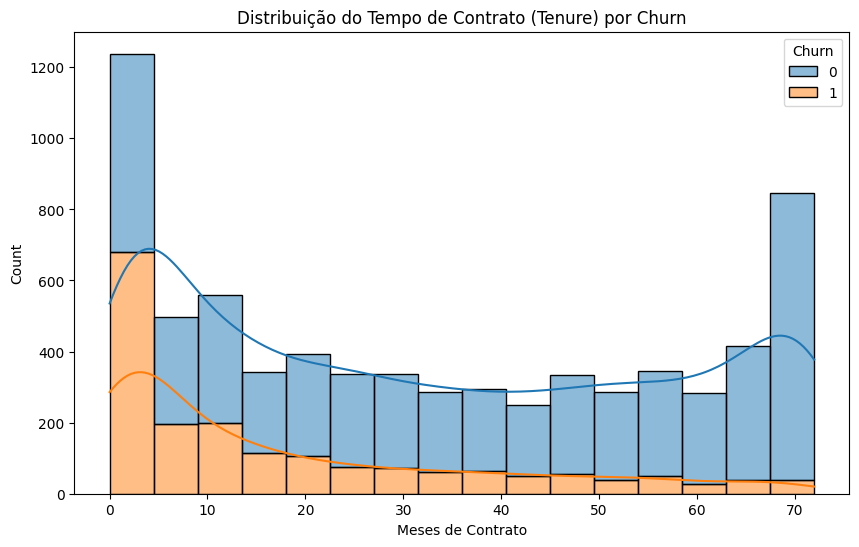

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dados_normalizados, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição do Tempo de Contrato (Tenure) por Churn')
plt.xlabel('Meses de Contrato')
plt.show()

#📄Relatorio Final